In [1]:
import pandas as pd
#import numpy as np

from TSForecasting.TsForecasting import TimeSeriesForecast

Using TensorFlow backend.


In [2]:

def testingData():
    """
    Reading Test Data 
    input:
        none
    output:
        data: testing dataframe with index => DisplayTime value => GlucoseValues
    """
    #reading datasets for training
    data = pd.read_csv("~/Desktop/NCSA_genomics/Data/CGManalyzer.csv")

    diabetic_1 = data[data['ID'] == "ID01"]
    diabetic_2 = data[data['ID'] == "ID11"]
    prediabetic = data[data['ID'] == "ID21"]
    nondiabetic = data[data['ID'] == "ID29"]
    
#     diabetic_1 = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID01.csv")
#     diabetic_2 = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID11.csv")
#     prediabetic = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID21.csv")
#     nondiabetic = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID29.csv")
    
    #Converting the Display Time to 'timeStamp' so that it can be used as an index
    diabetic_1['timeStamp'] = diabetic_1['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    diabetic_1.drop(['ID'], axis=1, inplace=True)
    diabetic_1 = diabetic_1.set_index(['timeStamp'], drop=True)
    
    prediabetic['timeStamp'] = prediabetic['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    prediabetic.drop(['ID'], axis=1, inplace=True)
    prediabetic = prediabetic.set_index(['timeStamp'], drop=True)
    
    nondiabetic['timeStamp'] = nondiabetic['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    nondiabetic.drop(['ID'], axis=1, inplace=True)
    nondiabetic = nondiabetic.set_index(['timeStamp'], drop=True)
    
    diabetic_2['timeStamp'] = diabetic_2['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    diabetic_2.drop(['ID'], axis=1, inplace=True)
    diabetic_2 = diabetic_2.set_index(['timeStamp'], drop=True)
    
    return diabetic_1, diabetic_2, prediabetic, nondiabetic


In [3]:

test_set = testingData()


#obj = TimeSeriesForecast()
#obj.connectivityTester()

In [4]:
obj = TimeSeriesForecast()

Subject ID: 1636-69-026
Status: pre-diabetic
Length of the readings: 1796
Max. Glucose value: 182
Min. Glucose value: 62
Mean Glucose value: 115.156
Missing Values: 78
Percent of missing values: 4.34%

Days: 7 days 01:29:34
Subject ID: 1636-69-028
Status: non-diabetic
Length of the readings: 1822
Max. Glucose value: 216
Min. Glucose value: 55
Mean Glucose value: 115.385
Missing Values: 72
Percent of missing values: 3.95%

Days: 75 days 07:45:22
Subject ID: 1636-69-032
Status: pre-diabetic
Length of the readings: 1783
Max. Glucose value: 191
Min. Glucose value: 67
Mean Glucose value: 108.316
Missing Values: 29
Percent of missing values: 1.63%

Days: 6 days 04:34:32
Subject ID: 1636-69-035
Status: non-diabetic
Length of the readings: 2180
Max. Glucose value: 234
Min. Glucose value: 69
Mean Glucose value: 116.556
Missing Values: 137
Percent of missing values: 6.28%

Days: 11 days 01:04:20
Subject ID: 1636-69-048
Status: non-diabetic
Length of the readings: 1779
Max. Glucose value: 144
Min

Mean Glucose value: 106.728
Missing Values: 87
Percent of missing values: 4.83%

Days: 9 days 04:34:17
Subject ID: 2133-020
Status: non-diabetic
Length of the readings: 1826
Max. Glucose value: 201
Min. Glucose value: 40
Mean Glucose value: 96.927
Missing Values: 36
Percent of missing values: 1.97%

Days: 6 days 10:04:43
Subject ID: 2133-021
Status: pre-diabetic
Length of the readings: 1797
Max. Glucose value: 236
Min. Glucose value: 62
Mean Glucose value: 130.04
Missing Values: 57
Percent of missing values: 3.17%

Days: 6 days 07:39:27
Subject ID: 2133-022
Status: non-diabetic
Length of the readings: 1814
Max. Glucose value: 204
Min. Glucose value: 40
Mean Glucose value: 105.512
Missing Values: 81
Percent of missing values: 4.47%

Days: 6 days 12:34:33
Subject ID: 2133-023
Status: non-diabetic
Length of the readings: 1838
Max. Glucose value: 142
Min. Glucose value: 44
Mean Glucose value: 87.567
Missing Values: 77
Percent of missing values: 4.19%

Days: 7 days 10:09:25
Subject ID: 2133

In [5]:
diabetic_1, diabetic_2 , prediabetic, non_diabetic = testingData()#these time series' data will be used to plot comparison graphs
diabetic_1_faulty, diabetic_2_faulty, prediabetic_faulty, non_diabetic_faulty = testingData()#gaps will be introduced in these time series' for imputations 

501/501 [==============================] - 0s 798us/step
LSTM: 0.002664


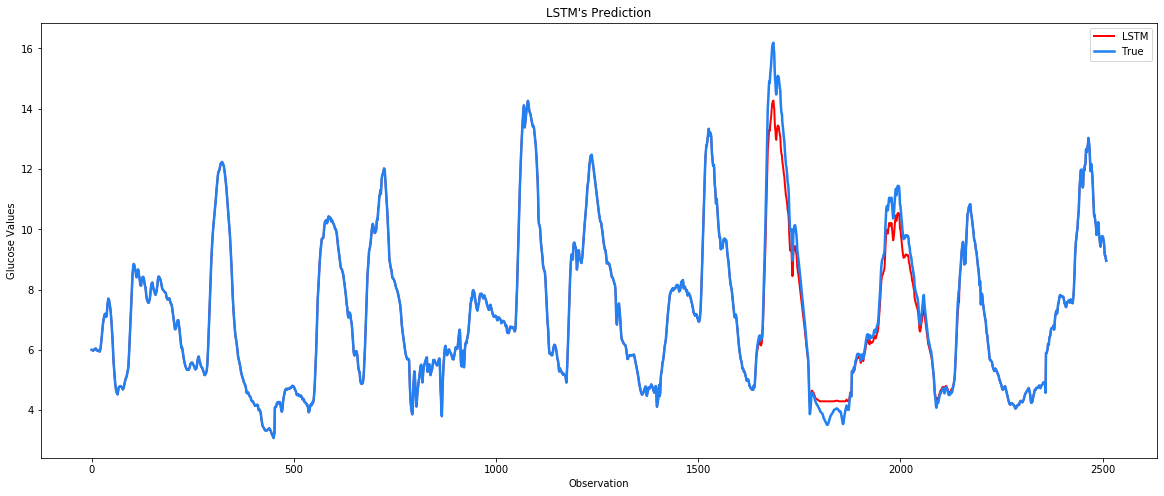

Index of Agreement is: 0.988
Mean Absolute Error is: 0.47817120010315045
Root Mean Squared Error is: 0.654
Mean Absolute Difference is: [2.8893015]
Fractional Bias is: 0.06
Mean Absolute Percentage Error is: 6.0


In [6]:
start, end = obj.createGap(diabetic_1)
gap_tester_diabetic_1 = diabetic_1.iloc[start:end+2]
diabetic_1_faulty = obj.faultyData(diabetic_1_faulty,start,end+1)

#here, we're actually running the model and getting the imputed values for the gap
predicted, true = obj.testModel(gap_tester_diabetic_1)
#here we are are filling in the gap we created with imputed values generated by the model
for i in range(0,501):
     diabetic_1_faulty['glucoseValue'][start+i] = predicted[i][0]

obj.plot(diabetic_1_faulty['glucoseValue'].tolist(),diabetic_1['glucoseValue'].tolist())
obj.getMetrics(predicted,true)
diabetic_1_faulty.to_csv("~/Desktop/NCSA_genomics/Data/outputs/CGM_diabetic-1_imputed.csv")

501/501 [==============================] - 0s 657us/step
LSTM: 0.004269


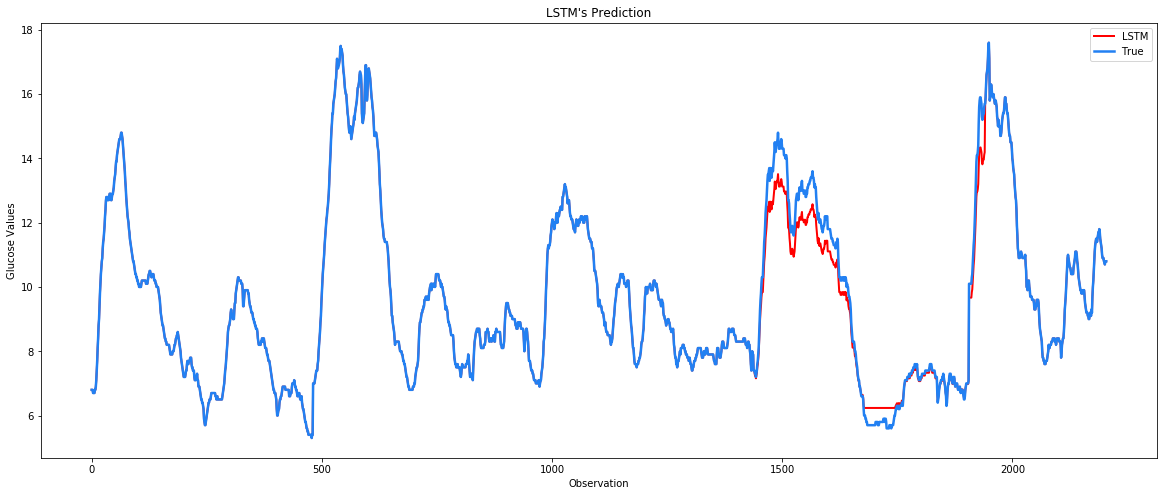

Index of Agreement is: 0.986
Mean Absolute Error is: 0.5068088034669797
Root Mean Squared Error is: 0.673
Mean Absolute Difference is: [1.8821675]
Fractional Bias is: 0.049
Mean Absolute Percentage Error is: 5.0


In [7]:
#repeating the same for diabetic type 2
start, end = obj.createGap(diabetic_2)
gap_tester_diabetic_2 = diabetic_2.iloc[start:end+2]
diabetic_2_faulty = obj.faultyData(diabetic_2_faulty,start,end+1)

predicted, true = obj.testModel(gap_tester_diabetic_2)

for i in range(0,501):
    diabetic_2_faulty['glucoseValue'][start+i] = predicted[i][0]
    
obj.plot(diabetic_2_faulty['glucoseValue'].tolist(),diabetic_2['glucoseValue'].tolist())
obj.getMetrics(predicted,true)
diabetic_2_faulty.to_csv("~/Desktop/NCSA_genomics/Data/outputs/CGM_diabetic-2_imputed.csv")

501/501 [==============================] - 0s 695us/step
LSTM: 0.002217


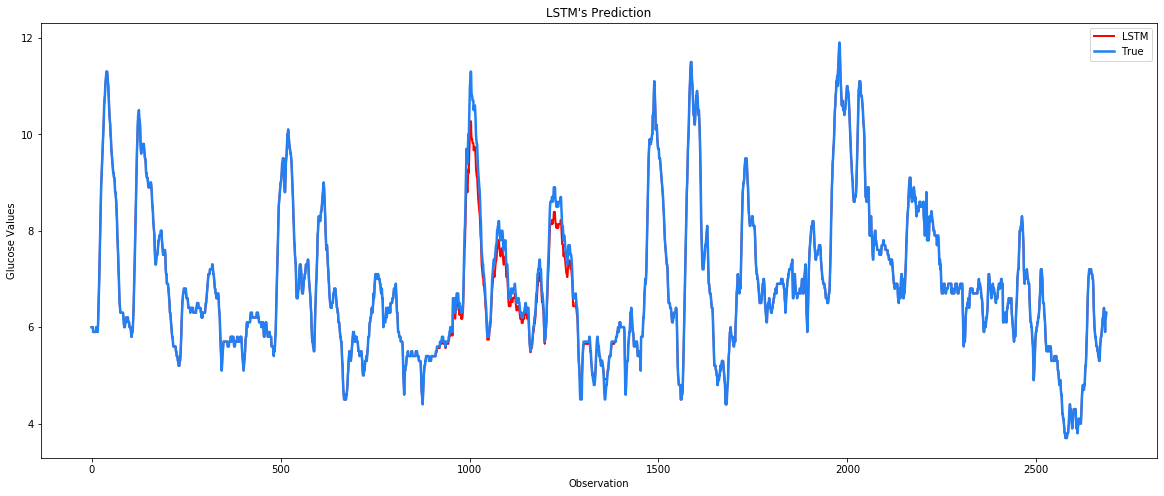

Index of Agreement is: 0.985
Mean Absolute Error is: 0.2297560236887065
Root Mean Squared Error is: 0.32
Mean Absolute Difference is: [1.1526821]
Fractional Bias is: 0.031
Mean Absolute Percentage Error is: 3.0


In [8]:
#repeating the same for prediabetic
start, end = obj.createGap(prediabetic)
gap_tester_prediabetic = prediabetic.iloc[start:end+2]
prediabetic_faulty = obj.faultyData(prediabetic_faulty,start,end+1)

predicted, true = obj.testModel(gap_tester_prediabetic)

for i in range(0,501):
    prediabetic_faulty['glucoseValue'][start+i] = predicted[i][0]
    
obj.plot(prediabetic_faulty['glucoseValue'].tolist(),prediabetic['glucoseValue'].tolist())
obj.getMetrics(predicted,true)
prediabetic_faulty.to_csv("~/Desktop/NCSA_genomics/Data/outputs/CGM_prediabetic_imputed.csv")

501/501 [==============================] - 0s 655us/step
LSTM: 0.004268


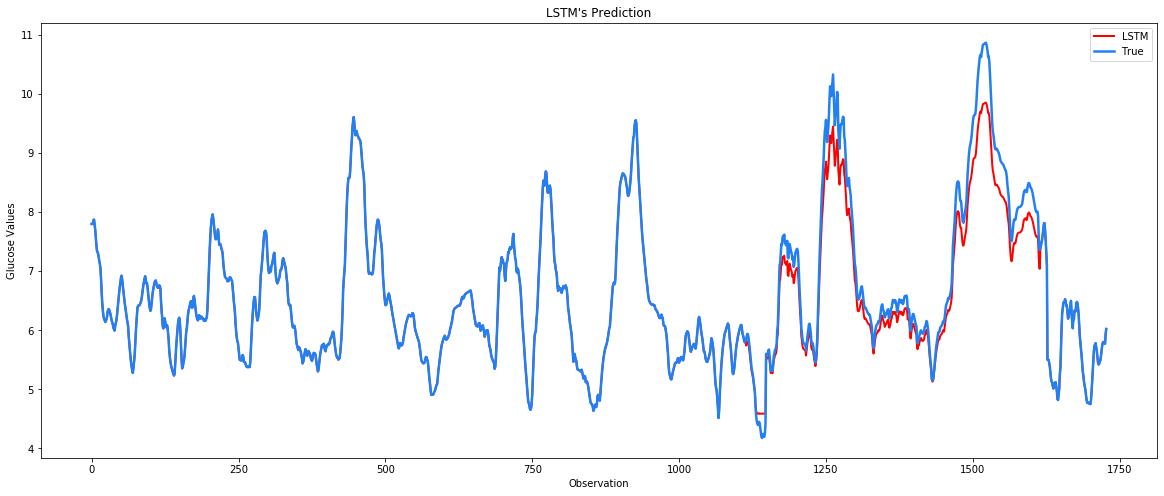

Index of Agreement is: 0.978
Mean Absolute Error is: 0.351251737019735
Root Mean Squared Error is: 0.437
Mean Absolute Difference is: [1.3693975]
Fractional Bias is: 0.045
Mean Absolute Percentage Error is: 4.0


In [9]:
#repeating the same for non-diabetic
start, end = obj.createGap(non_diabetic)
gap_tester_non_diabetic = non_diabetic.iloc[start:end+2]
non_diabetic_faulty = obj.faultyData(non_diabetic_faulty,start,end+1)

predicted, true = obj.testModel(gap_tester_non_diabetic)

for i in range(0,501):
    non_diabetic_faulty['glucoseValue'][start+i] = predicted[i][0]
    
obj.plot(non_diabetic_faulty['glucoseValue'].tolist(),non_diabetic['glucoseValue'].tolist())
obj.getMetrics(predicted,true)
non_diabetic_faulty.to_csv("~/Desktop/NCSA_genomics/Data/outputs/CGM_nondiabetic_imputed.csv")